## ML Model Building -- K-Nearest Neighbors (KNN)

In [1]:
import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

from imblearn.over_sampling import RandomOverSampler

In [2]:
try:
    with open('../config.yaml') as file:
        config = yaml.safe_load(file)
except:
    print("Yaml file not found.")

In [3]:
# Load merged datasets -- Judicial Autonomy index, macro and micro indicators subset & V-Dem Dataset

q1_index_macro_micro_vdem = pd.read_csv(config['output_data']['q1_output_index_macro_micro_vdem'])
q1_index_macro_micro_vdem.head()

,country,year,country_year,index_measure,q1_macro_appointment_procedures_ind_measure,q1_micro_appointment_judges_ind_measure,q1_micro_appointment_court_presidents_ind_measure,q1_micro_appointment_veto_ind_measure,q1_macro_selection_criteria_ind_measure,q1_micro_selection_predetermined_law_ind_measure,...,q1_micro_disciplinary_proceedings_law_ind_measure,q1_micro_disciplinary_proceedings_actors_ind_measure,q1_micro_conflict_recusal_evaluation_ind_measure,q1_macro_judicial_administration_ind_measure,q1_micro_judicial_self_governance_bodies_ind_measure,q1_micro_judicial_self_governance_competences_ind_measure,q1_micro_courts_administration_ind_measure,reg_type,v2x_regime,v2x_polyarchy
0,Albania,2000,Albania_2000,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.407
1,Albania,2001,Albania_2001,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.440
2,Albania,2002,Albania_2002,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.484
3,Albania,2003,Albania_2003,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.490
4,Albania,2004,Albania_2004,0.55,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,1.00,0.5,0.5,0.0,1.0,0.0,1.0,0.490


In [4]:
# Check data types of all columns
q1_index_macro_micro_vdem.dtypes

country                                                       object
year                                                           int64
country_year                                                  object
index_measure                                                float64
q1_macro_appointment_procedures_ind_measure                  float64
q1_micro_appointment_judges_ind_measure                      float64
q1_micro_appointment_court_presidents_ind_measure            float64
q1_micro_appointment_veto_ind_measure                        float64
q1_macro_selection_criteria_ind_measure                      float64
q1_micro_selection_predetermined_law_ind_measure             float64
q1_micro_selection_intl_standards_ind_measure                float64
q1_micro_transparency_appeal_ind_measure                     float64
q1_macro_professional_rights_ind_measure                     float64
q1_micro_judge_tenure_ind_measure                            float64
q1_micro_judge_immunity_ind_measur

In [5]:
# Check for missing values
q1_index_macro_micro_vdem.isna().sum()

country                                                      0
year                                                         0
country_year                                                 0
index_measure                                                0
q1_macro_appointment_procedures_ind_measure                  0
q1_micro_appointment_judges_ind_measure                      0
q1_micro_appointment_court_presidents_ind_measure            0
q1_micro_appointment_veto_ind_measure                        0
q1_macro_selection_criteria_ind_measure                      0
q1_micro_selection_predetermined_law_ind_measure             0
q1_micro_selection_intl_standards_ind_measure                0
q1_micro_transparency_appeal_ind_measure                     0
q1_macro_professional_rights_ind_measure                     0
q1_micro_judge_tenure_ind_measure                            0
q1_micro_judge_immunity_ind_measure                          0
q1_micro_judge_salary_ind_measure                      

### 1 KNN Model

#### 1.1 Classification Model -- Predicting V-Dem Regime Type (Boolean)

#### 1.1.1 Based on Judicial Autonomy Micro Indicators

In [4]:
# Select relevant columns for KNN classification model
columns_micro_regtype_knn_class_model=['reg_type',
                                       'q1_micro_appointment_judges_ind_measure',
                                       'q1_micro_appointment_court_presidents_ind_measure',
                                       'q1_micro_appointment_veto_ind_measure',
                                       'q1_micro_selection_predetermined_law_ind_measure',
                                       'q1_micro_selection_intl_standards_ind_measure',
                                       'q1_micro_transparency_appeal_ind_measure',
                                       'q1_micro_judge_tenure_ind_measure',
                                       'q1_micro_judge_immunity_ind_measure',
                                       'q1_micro_judge_salary_ind_measure',
                                       'q1_micro_disciplinary_proceedings_law_ind_measure',
                                       'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                       'q1_micro_conflict_recusal_evaluation_ind_measure',
                                       'q1_micro_judicial_self_governance_bodies_ind_measure',
                                       'q1_micro_judicial_self_governance_competences_ind_measure',
                                       'q1_micro_courts_administration_ind_measure']

In [5]:
# Subset columns for KNN classification model
knn_classifier_regtype_data_micro = q1_index_macro_micro_vdem[columns_micro_regtype_knn_class_model].copy()

# Transform regime type (target column) to boolean
knn_classifier_regtype_data_micro['reg_type'] = knn_classifier_regtype_data_micro['reg_type'].astype('boolean')                                                 

In [6]:
# Define target and features
target = knn_classifier_regtype_data_micro['reg_type']
features = knn_classifier_regtype_data_micro.drop(columns='reg_type')

In [7]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [8]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_regtype_micro = KNeighborsClassifier(n_neighbors=3)

In [9]:
# Fit the model
knn_cl_regtype_micro.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
pred = knn_cl_regtype_micro.predict(X_train)
#pred

In [11]:
knn_cl_regtype_micro.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_cl_regtype_micro.score(X_test, y_test)*100,2)} %")

0.9347826086956522

**Outcome:** The accuracy of the model is 93.48 %

#### 1.1.2 Based on Judicial Autonomy Macro Indicators

In [13]:
# Select relevant columns for KNN classification model
columns_macro_regtype_knn_class_model=['reg_type',
                                       'q1_macro_appointment_procedures_ind_measure',
                                       'q1_macro_selection_criteria_ind_measure',
                                       'q1_macro_professional_rights_ind_measure',
                                       'q1_macro_professional_obligations_ind_measure',
                                       'q1_macro_judicial_administration_ind_measure']

In [14]:
# Subset columns for KNN classification model
knn_classifier_regtype_data_macro = q1_index_macro_micro_vdem[columns_macro_regtype_knn_class_model].copy()

# Transform regime type (target column) to boolean
knn_classifier_regtype_data_macro['reg_type'] = knn_classifier_regtype_data_macro['reg_type'].astype('boolean')                                                 

In [15]:
# Define target and features
target = knn_classifier_regtype_data_macro['reg_type']
features = knn_classifier_regtype_data_macro.drop(columns='reg_type')

In [16]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [17]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_regtype_macro = KNeighborsClassifier(n_neighbors=3)

In [18]:
# Fit the model
knn_cl_regtype_macro.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
pred = knn_cl_regtype_macro.predict(X_train)
#pred

In [21]:
knn_cl_regtype_macro.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_cl_regtype_macro.score(X_test, y_test)*100,2)} %")

0.9510869565217391

**Outcome:** The accuracy of the model is 95.10 %

**Summary:**
- The accuracy of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Regime Types (target)** slightly **increases from 93.48% to 95.10%** in comparison to using the micro indicators.

#### 1.2 Classification Model -- Predicting V-Dem Regimes of the World (4 Types)

#### 1.2.1 Based on Judicial Autonomy Micro Indicators

In [4]:
# Select relevant columns for KNN classification model
columns_micro_row_knn_class_model=['v2x_regime',
                                   'q1_micro_appointment_judges_ind_measure',
                                   'q1_micro_appointment_court_presidents_ind_measure',
                                   'q1_micro_appointment_veto_ind_measure',
                                   'q1_micro_selection_predetermined_law_ind_measure', 
                                   'q1_micro_selection_intl_standards_ind_measure',
                                   'q1_micro_transparency_appeal_ind_measure',
                                   'q1_micro_judge_tenure_ind_measure',
                                   'q1_micro_judge_immunity_ind_measure',
                                   'q1_micro_judge_salary_ind_measure',
                                   'q1_micro_disciplinary_proceedings_law_ind_measure',
                                   'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                   'q1_micro_conflict_recusal_evaluation_ind_measure',
                                   'q1_micro_judicial_self_governance_bodies_ind_measure',
                                   'q1_micro_judicial_self_governance_competences_ind_measure',
                                   'q1_micro_courts_administration_ind_measure']

In [5]:
# Subset columns for KNN classification model
knn_classifier_row_data_micro = q1_index_macro_micro_vdem[columns_micro_row_knn_class_model].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
knn_classifier_row_data_micro['v2x_regime'] = knn_classifier_row_data_micro['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

In [6]:
# Define target and features
target = knn_classifier_row_data_micro['v2x_regime']
features = knn_classifier_row_data_micro.drop(columns='v2x_regime')

In [7]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [8]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_row_micro = KNeighborsClassifier(n_neighbors=3)

In [9]:
# Fit the model
knn_cl_row_micro.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
pred = knn_cl_row_micro.predict(X_train)
#pred

In [11]:
knn_cl_row_micro.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_cl_row_micro.score(X_test, y_test)*100,2)} %")

0.9130434782608695

**Outcome:** The accuracy of the model is 91.30%

**Summary:**
- The **accuracy** of the model based on the Judicial Autonomy micro indicators (features) and V-Dem Regimes of the World (target) is **91.30%**.

#### 1.2.2 Based on Judicial Autonomy Macro Indicators

In [4]:
# Select relevant columns for KNN classification model
columns_macro_row_knn_class_model=['v2x_regime',
                                   'q1_macro_appointment_procedures_ind_measure',
                                   'q1_macro_selection_criteria_ind_measure',
                                   'q1_macro_professional_rights_ind_measure',
                                   'q1_macro_professional_obligations_ind_measure',
                                   'q1_macro_judicial_administration_ind_measure']

In [5]:
# Subset columns for KNN classification model
knn_classifier_row_data_macro = q1_index_macro_micro_vdem[columns_macro_row_knn_class_model].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
knn_classifier_row_data_macro['v2x_regime'] = knn_classifier_row_data_macro['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

In [6]:
# Define target and features
target = knn_classifier_row_data_macro['v2x_regime']
features = knn_classifier_row_data_macro.drop(columns='v2x_regime')

In [7]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [8]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_row_macro = KNeighborsClassifier(n_neighbors=3)

In [9]:
# Fit the model
knn_cl_row_macro.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
pred = knn_cl_row_macro.predict(X_train)
#pred

In [11]:
knn_cl_row_macro.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_cl_row_macro.score(X_test, y_test)*100,2)} %")

0.8967391304347826

**Outcome:** The accuracy of the model is 89.67 %.


**Summary:** 
- The accuracy of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Regimes of the World (target)** is 89.67% and therefore **slightly lower** than when based on the micro indicators (91.30%).
- Overall, the **model's accuracy is slightly lower compared to using V-Dem Regime Types (target)** with the accuracy being 93.48% for micro indicators and 95.10% for macro indicators, respectively. 

#### 1.3 Regression Model -- Predicting V-Dem Democracy Index Score

#### 1.3.1 Based on Judicial Autonomy Micro Indicators

In [41]:
# Select relevant columns for KNN regression model
columns_micro_knn_regr_model=['v2x_polyarchy', 
                                 'q1_micro_appointment_judges_ind_measure',
                                 'q1_micro_appointment_court_presidents_ind_measure',
                                 'q1_micro_appointment_veto_ind_measure',
                                 'q1_micro_selection_predetermined_law_ind_measure',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 'q1_micro_judge_salary_ind_measure',
                                 'q1_micro_disciplinary_proceedings_law_ind_measure',
                                 'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure',
                                 'q1_micro_courts_administration_ind_measure']

In [42]:
# Subset columns for KNN classification model
knn_regression_data_micro = q1_index_macro_micro_vdem[columns_micro_knn_regr_model].copy()

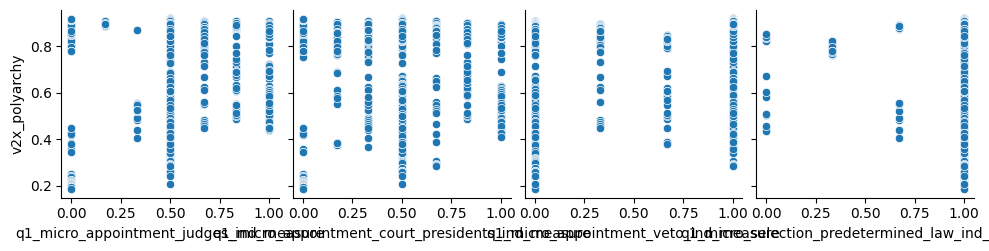

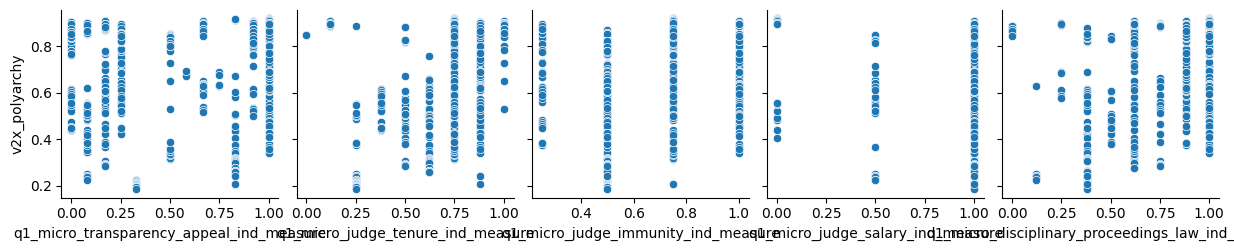

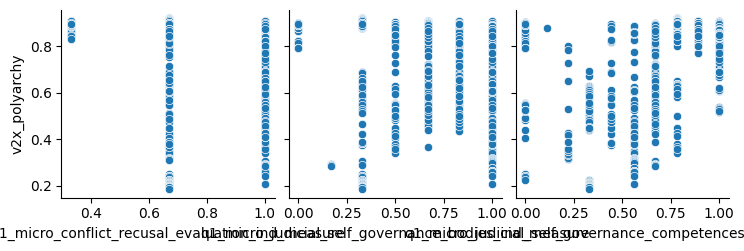

In [43]:
# Pairplot to check distribution of values

sns.pairplot(knn_regression_data_micro, y_vars=['v2x_polyarchy'], x_vars=knn_regression_data_micro.columns[1:5], kind='scatter')
sns.pairplot(knn_regression_data_micro, y_vars=['v2x_polyarchy'], x_vars=knn_regression_data_micro.columns[6:11], kind='scatter')
sns.pairplot(knn_regression_data_micro, y_vars=['v2x_polyarchy'], x_vars=knn_regression_data_micro.columns[12:15], kind='scatter');

In [44]:
# Define target and features
target = knn_regression_data_micro['v2x_polyarchy']
features = knn_regression_data_micro.drop(columns='v2x_polyarchy')

In [45]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [46]:
# Initialize KNN instance (with hyperparameter n_neighbors = 10)
knn_reg_micro = KNeighborsRegressor(n_neighbors=10)

In [47]:
# Fit the model
knn_reg_micro.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [48]:
pred = knn_reg_micro.predict(X_train)
#pred

In [49]:
knn_reg_micro.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_reg_micro.score(X_test, y_test)*100,2)} %")

The R2 of the model is 90.98 %


**Outcome:** The R-Squared of the model is 90.98 %

**Summary:**
- The R-Squared of the model based on the **Judicial Autonomy micro indicators (features) and V-Dem Democracy Index (target)** is **90.98%**.

#### 1.3.2 Based on Judicial Autonomy Macro Indicators

In [50]:
# Select relevant columns for KNN classification model
columns_macro_knn_regr_model=['v2x_polyarchy',
                              'q1_macro_appointment_procedures_ind_measure',
                              'q1_macro_selection_criteria_ind_measure',
                              'q1_macro_professional_rights_ind_measure',
                              'q1_macro_professional_obligations_ind_measure',
                              'q1_macro_judicial_administration_ind_measure']

In [51]:
# Subset columns for KNN classification model
knn_regression_data_macro = q1_index_macro_micro_vdem[columns_macro_knn_regr_model].copy()

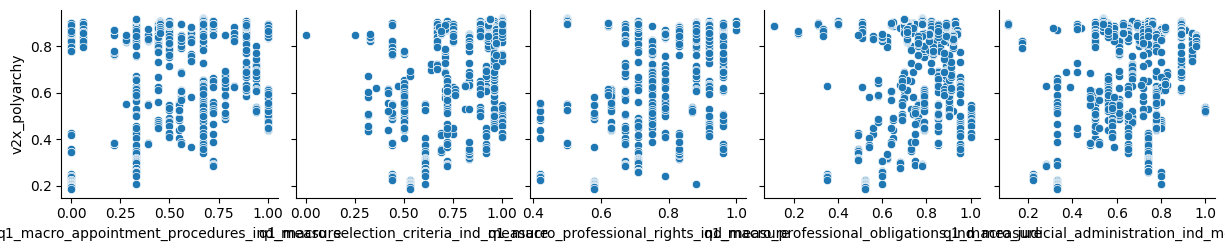

In [52]:
# Pairplot to check distribution of values
sns.pairplot(knn_regression_data_macro, y_vars=['v2x_polyarchy'], x_vars=knn_regression_data_macro.columns[1:6], kind='scatter');

In [53]:
# Define target and features
target = knn_regression_data_macro['v2x_polyarchy']
features = knn_regression_data_macro.drop(columns='v2x_polyarchy')

In [54]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [55]:
# Initialize KNN instance (with hyperparameter n_neighbors = 10)
knn_reg_macro = KNeighborsRegressor(n_neighbors=10)

In [56]:
# Fit the model
knn_reg_macro.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [57]:
pred = knn_reg_macro.predict(X_train)
#pred

In [58]:
knn_reg_macro.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_reg.score(X_test, y_test)*100,2)} %")

0.8363026125760229

**Outcome:** The R-Squared of the model is 83.63 %.

**Summary:** 
- The R-Squared of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Democracy Index (target)** is **83.63%** and therefore **lower** than when based on the micro indicators (90.98%).

- Overall, the model's accuracy is lower compared to using V-Dem Regime Types (target) with the accuracy being 93.48 % for micro indicators and 95.10 % for macro indicators, respectively.

### 1.4 Summary -- KNN Model Building

- **Categorical predictions of (boolean) V-Dem Regime Types (target) with Judicial Autonomy macro indicators (features)** returning the **highest accuracy of 95.10%**, followed by the micro indicators returning an accuracy of 93.48%.

- The accuracy of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Regimes of the World (target)** is 89.67% and therefore **slightly lower** than when based on the micro indicators (91.30%).

- The R-Squared of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Democracy Index (target)** is **83.63%** and therefore **lower** than when based on the micro indicators (90.98%).

- For predicting the V-Dem Regimes of the World (categorical, 4 Types) and V-Dem Democracy Index (numerical), Judicial Autonomy **micro indicators performed best**.

- **Next steps**: Feature Selection for predicting V-Dem Regimes of the World (4 Types) and V-Dem Democracy Index Score (numerical), based on Judicial Autonomy micro indicators and macro indicators. 

### 2 Feature Selection

#### 2.1 Feature Selection for Classification Model -- Predicting V-Dem Regimes of the World (4 Types)

#### 2.1.1 Based on Judicial Autonomy Micro Indicators

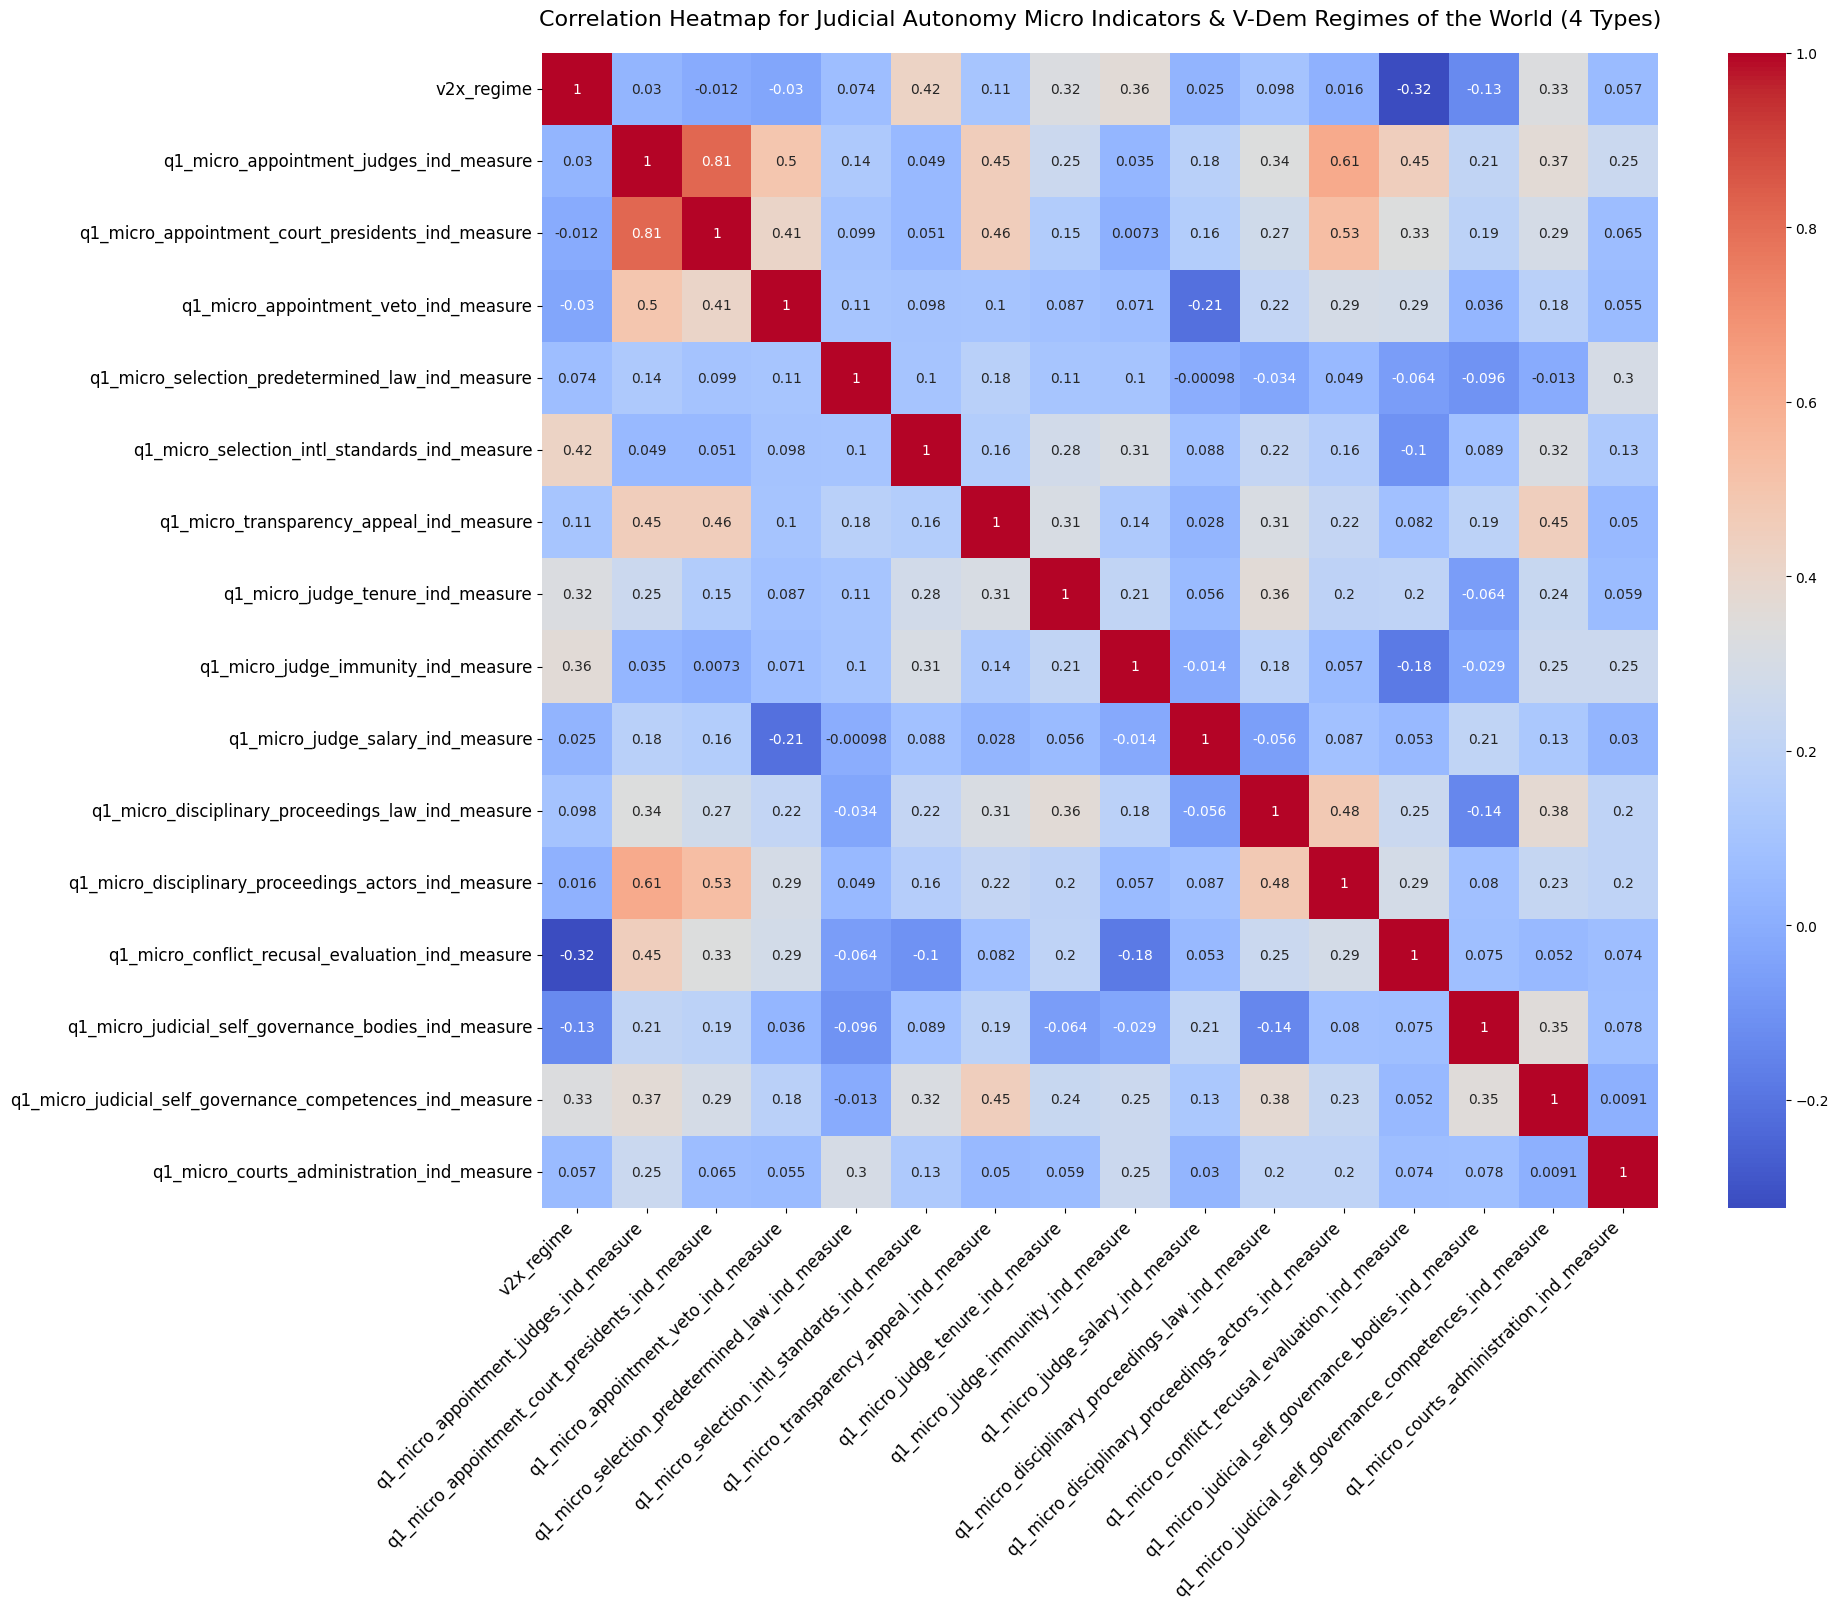

In [20]:
# Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Regimes of the World

# Select columns
columns_correlation_matrix_micro=['v2x_regime', 
                                 'q1_micro_appointment_judges_ind_measure',
                                 'q1_micro_appointment_court_presidents_ind_measure',
                                 'q1_micro_appointment_veto_ind_measure',
                                 'q1_micro_selection_predetermined_law_ind_measure',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 'q1_micro_judge_salary_ind_measure',
                                 'q1_micro_disciplinary_proceedings_law_ind_measure',
                                 'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure',
                                 'q1_micro_courts_administration_ind_measure']

# Plot Heatmap
correlation_matrix_feature_sel_micro = q1_index_macro_micro_vdem[columns_correlation_matrix_micro].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_feature_sel_micro, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Judicial Autonomy Micro Indicators & V-Dem Regimes of the World (4 Types)", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("../figures/feature_selection_vdem_row_micro_indicators_heatmap.jpeg", format="jpeg", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show();

**Outcome:**
- Low correlation (< 0.1) between v2x_regime (target) and features which were subsequently removed:
  - q1_micro_appointment_judges_ind_measure
  - q1_micro_appointment_court_presidents_ind_measure
  - q1_micro_appointment_veto_ind_measure
  - q1_micro_selection_predetermined_law_ind_measure
  - q1_micro_judge_salary_ind_measure
  - q1_micro_disciplinary_proceedings_law_ind_measure
  - q1_micro_disciplinary_proceedings_actors_ind_measure
  - q1_micro_courts_administration_ind_measure
    

In [16]:
# Feature selection to improve KNN classification model (correlation <0.1)
# Logic of feature selection: low correlaction between features, but high correlaction between features and our target

selected_columns_micro_knn_class_model=['v2x_regime',
                                        'q1_micro_selection_intl_standards_ind_measure',
                                        'q1_micro_transparency_appeal_ind_measure',
                                        'q1_micro_judge_tenure_ind_measure',
                                        'q1_micro_judge_immunity_ind_measure',
                                        'q1_micro_conflict_recusal_evaluation_ind_measure',
                                        'q1_micro_judicial_self_governance_bodies_ind_measure',
                                        'q1_micro_judicial_self_governance_competences_ind_measure']

In [17]:
# Subset columns for KNN classification model
knn_classifier_row_data_micro_sel = q1_index_macro_micro_vdem[selected_columns_micro_knn_class_model].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
knn_classifier_row_data_micro_sel['v2x_regime'] = knn_classifier_row_data_micro_sel['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

In [18]:
# Define target and features
target = knn_classifier_row_data_micro_sel['v2x_regime']
features = knn_classifier_row_data_micro_sel.drop(columns='v2x_regime')

In [19]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [20]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_row_micro_sel = KNeighborsClassifier(n_neighbors=3)

In [21]:
# Fit the model
knn_cl_row_micro_sel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
pred = knn_cl_row_micro_sel.predict(X_train)
#pred

In [23]:
knn_cl_row_micro_sel.score(X_test, y_test)
#print(f"The accuracy of the model is {round(knn_cl_row_micro_sel.score(X_test, y_test)*100,2)} %")

0.907608695652174

**Outcome:** The accuracy of the model is 90.76%

**Summary:**
- After feature selection, the accuracy of the model based on the **Judicial Autonomy micro indicators (features) and V-Dem Regimes of the World (target)** is **90.76%**, and therefore **slightly lower than before (91.30%)**.

#### 2.1.2 Based on Judicial Autonomy Macro Indicators

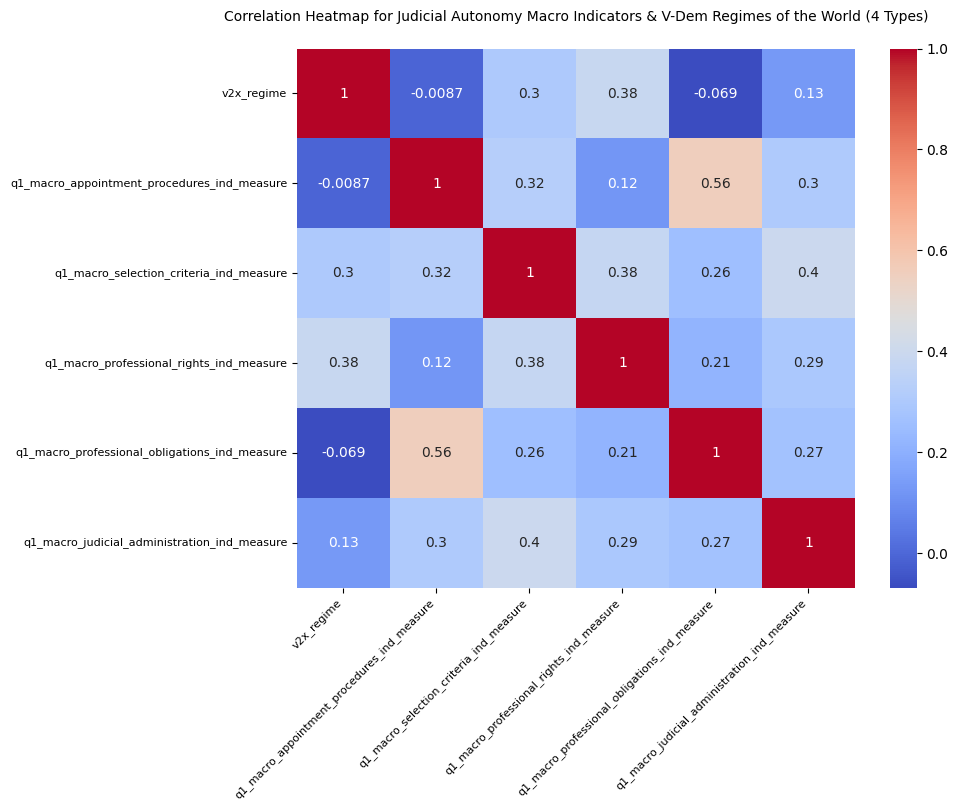

In [4]:
# Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Regimes of the World (4 Types)

# Select columns
columns_correlation_matrix_macro=['v2x_regime',
                                  'q1_macro_appointment_procedures_ind_measure',
                                  'q1_macro_selection_criteria_ind_measure',
                                  'q1_macro_professional_rights_ind_measure',
                                  'q1_macro_professional_obligations_ind_measure',
                                  'q1_macro_judicial_administration_ind_measure']

# Plot Heatmap
correlation_matrix_feature_sel_macro = q1_index_macro_micro_vdem[columns_correlation_matrix_macro].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix_feature_sel_macro, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Regimes of the World (4 Types)", fontsize=10, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.savefig("../figures/feature_selection_vdem_row_macro_indicators_heatmap.jpeg", format="jpeg", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show();

**Outcome:**
- Low correlation (< 0.1) between v2x_regime (target) and features which were subsequently removed:
  - q1_macro_appointment_procedures_ind_measure
  - q1_macro_professional_obligations_ind_measure


In [42]:
# Feature selection to improve KNN classification model (correlation <0.1)
# Logic of feature selection: low correlaction between features, but high correlaction between features and our target

selected_columns_macro_knn_class_model=['v2x_regime',
                                        'q1_macro_selection_criteria_ind_measure',
                                        'q1_macro_professional_rights_ind_measure',
                                        'q1_macro_judicial_administration_ind_measure']

In [43]:
# Subset columns for KNN classification model
knn_classifier_row_data_macro_sel = q1_index_macro_micro_vdem[selected_columns_macro_knn_class_model].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
knn_classifier_row_data_macro_sel['v2x_regime'] = knn_classifier_row_data_macro_sel['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

In [44]:
# Define target and features
target = knn_classifier_row_data_macro_sel['v2x_regime']
features = knn_classifier_row_data_macro_sel.drop(columns='v2x_regime')

In [45]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [46]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_cl_row_macro_sel = KNeighborsClassifier(n_neighbors=3)

In [47]:
# Fit the model
knn_cl_row_macro_sel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
pred = knn_cl_row_macro_sel.predict(X_train)
#pred

In [49]:
knn_cl_row_macro_sel.score(X_test, y_test)
#print(f"The accuracy of the model is {round(knn_cl_row_macro_sel.score(X_test, y_test)*100,2)} %")

0.8913043478260869

**Outcome:** The accuracy of the model is 89.13%

**Summary:**
- After feature selection, the accuracy of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Regimes of the World (target)** is **89.13%**, and therefore **slightly lower than before (89.67%)**.

#### 2.2 Feature Selection for Regression Model -- Predicting V-Dem Democracy Index Score

#### 2.2.1 Based on Judicial Autonomy Micro Indicators

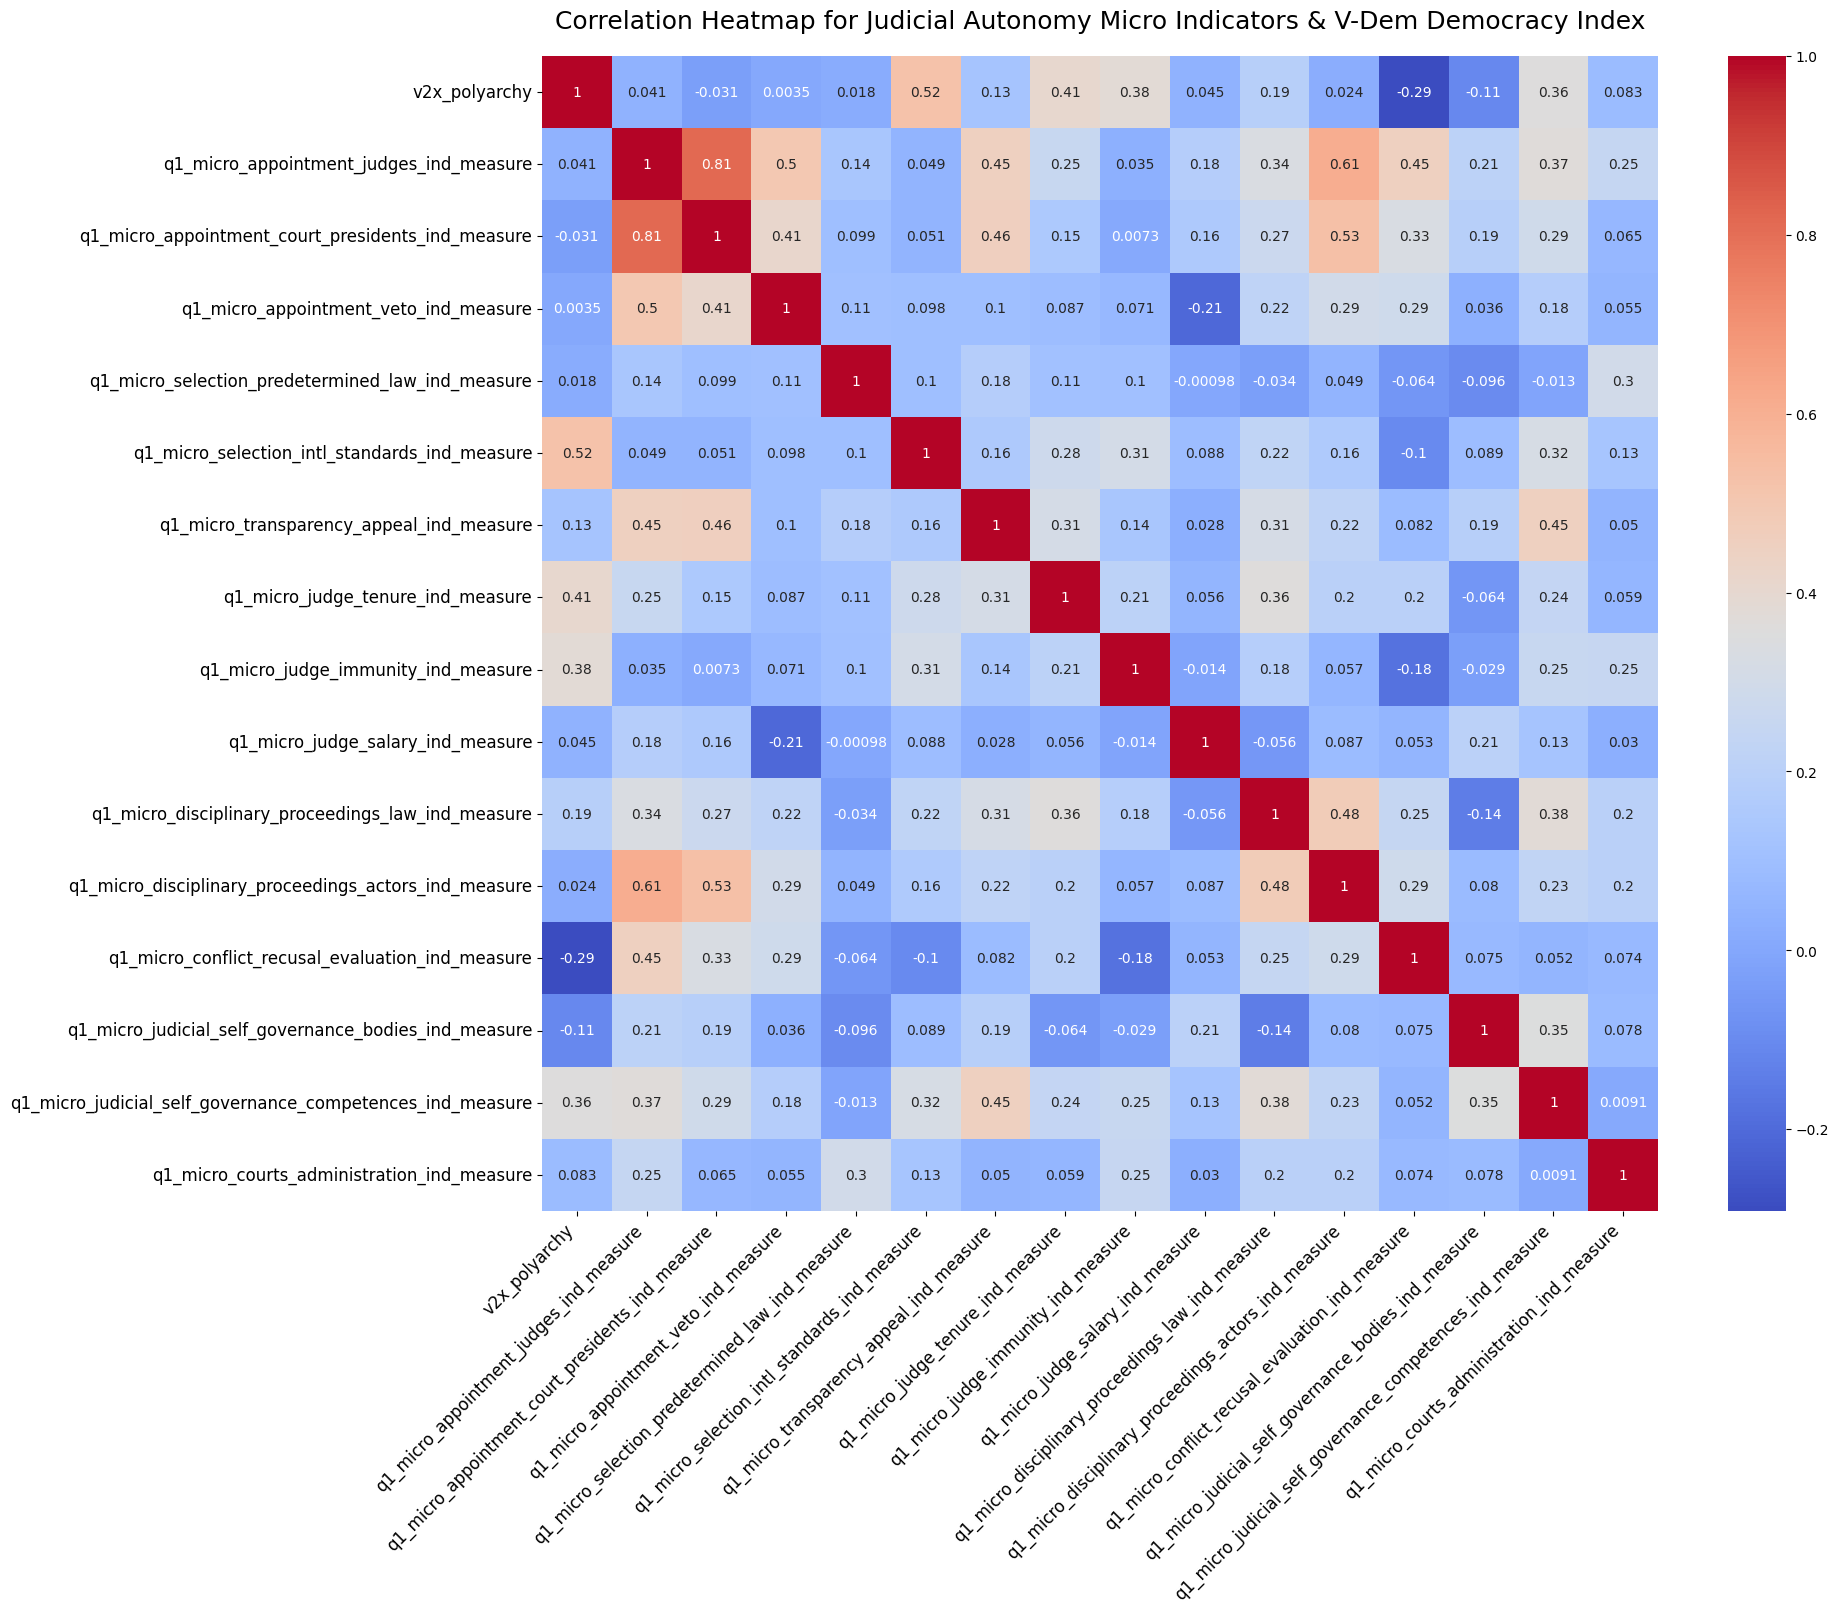

In [26]:
# Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Democracy Index

# Select columns
columns_correlation_matrix_micro=['v2x_polyarchy', 
                                 'q1_micro_appointment_judges_ind_measure',
                                 'q1_micro_appointment_court_presidents_ind_measure',
                                 'q1_micro_appointment_veto_ind_measure',
                                 'q1_micro_selection_predetermined_law_ind_measure',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 'q1_micro_judge_salary_ind_measure',
                                 'q1_micro_disciplinary_proceedings_law_ind_measure',
                                 'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure',
                                 'q1_micro_courts_administration_ind_measure']

# Plot Heatmap
correlation_matrix_feature_sel_micro = q1_index_macro_micro_vdem[columns_correlation_matrix_micro].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_feature_sel_micro, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Judicial Autonomy Micro Indicators & V-Dem Democracy Index", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("../figures/feature_selection_vdem_index_micro_indicators_heatmap.jpeg", format="jpeg", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show();

**Outcome:**
- Low correlation (< 0.1) between v2x_polyarchy (target) and features which were subsequently removed:
  - q1_micro_appointment_judges_ind_measure,
  - q1_micro_appointment_court_presidents_ind_measure,
  - q1_micro_appointment_veto_ind_measure,
  - q1_micro_selection_predetermined_law_ind_measure,
  - q1_micro_judge_salary_ind_measure,
  - q1_micro_disciplinary_proceedings_actors_ind_measure,
  - q1_micro_courts_administration_ind_measure.

In [106]:
# Feature selection to improve KNN regression model (correlation <0.1)
selected_columns_micro_knn_regr_model=['v2x_polyarchy',
                                 'q1_micro_selection_intl_standards_ind_measure',
                                 'q1_micro_transparency_appeal_ind_measure',
                                 'q1_micro_judge_tenure_ind_measure',
                                 'q1_micro_judge_immunity_ind_measure',
                                 'q1_micro_disciplinary_proceedings_law_ind_measure',
                                 'q1_micro_conflict_recusal_evaluation_ind_measure',
                                 'q1_micro_judicial_self_governance_bodies_ind_measure',
                                 'q1_micro_judicial_self_governance_competences_ind_measure']

In [107]:
# Subset columns for KNN classification model
knn_regression_data_micro_sel = q1_index_macro_micro_vdem[selected_columns_micro_knn_regr_model].copy()

In [108]:
# Define target and features
target = knn_regression_data_micro_sel['v2x_polyarchy']
features = knn_regression_data_micro_sel.drop(columns='v2x_polyarchy')

In [109]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [110]:
# Initialize KNN instance (with hyperparameter n_neighbors = 10)
knn_reg_micro_sel = KNeighborsRegressor(n_neighbors=10)

In [111]:
# Fit the model
knn_reg_micro_sel.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [112]:
pred = knn_reg_micro_sel.predict(X_train)
#pred

In [113]:
knn_reg_micro_sel.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_reg_micro_sel.score(X_test, y_test)*100,2)} %")

0.9230394913166206

**Outcome:** The R-Squared of the model is 92.30%.

**Summary:**
- After feature selection, the R-Squared of the model based on the **Judicial Autonomy micro indicators (features) and V-Dem Democracy Index (target)** is **92.30%**, and **slightly higher than before (90.98%)**.

#### 2.2.2 Based on Judicial Autonomy Macro Indicators

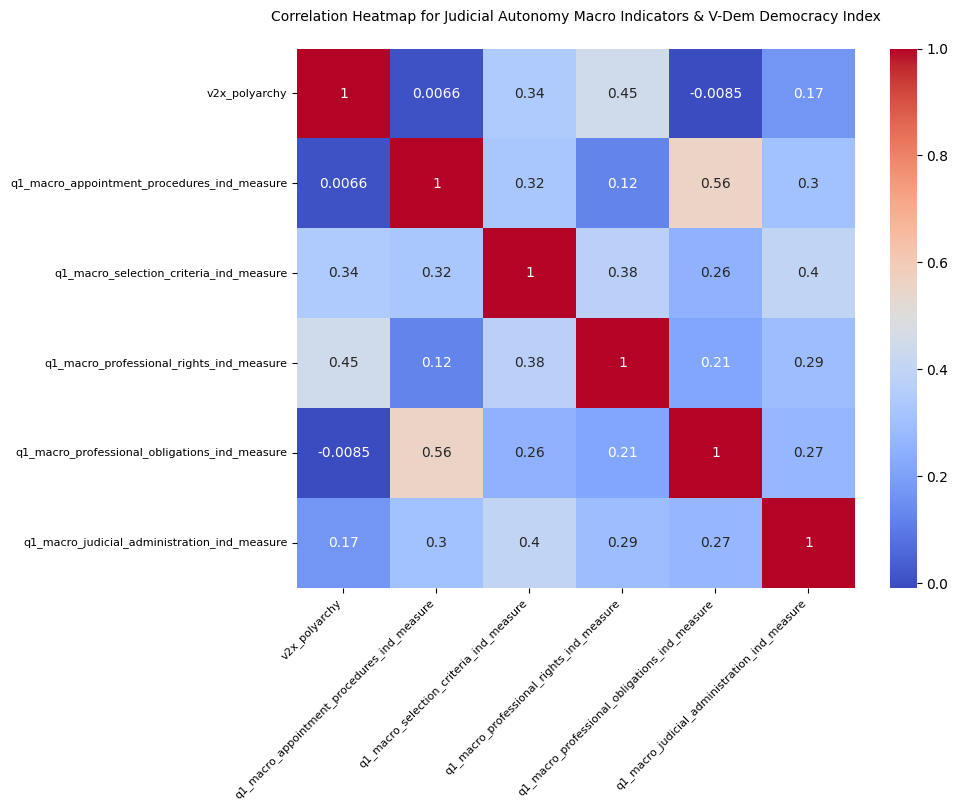

In [30]:
# Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Democracy Index

# Select columns
columns_correlation_matrix_macro=['v2x_polyarchy',
                                       'q1_macro_appointment_procedures_ind_measure',
                                       'q1_macro_selection_criteria_ind_measure',
                                       'q1_macro_professional_rights_ind_measure',
                                       'q1_macro_professional_obligations_ind_measure',
                                       'q1_macro_judicial_administration_ind_measure']

# Plot Heatmap
correlation_matrix_feature_sel_macro = q1_index_macro_micro_vdem[columns_correlation_matrix_macro].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix_feature_sel_macro, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Judicial Autonomy Macro Indicators & V-Dem Democracy Index", fontsize=10, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.savefig("../figures/feature_selection_vdem_index_macro_indicators_heatmap.jpeg", format="jpeg", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show();

**Outcome:**
- Low correlation (< 0.1) between v2x_polyarchy (target) and features which were subsequently removed:
  - q1_macro_appointment_procedures_ind_measure
  - q1_macro_professional_obligations_ind_measure


In [96]:
# Feature selection to improve KNN regression model
selected_columns_macro_knn_regr_model=['v2x_polyarchy',
                                  'q1_macro_selection_criteria_ind_measure',
                                  'q1_macro_professional_rights_ind_measure',
                                  'q1_macro_judicial_administration_ind_measure']

In [97]:
# Subset columns for KNN classification model
knn_regression_data_macro_sel = q1_index_macro_micro_vdem[selected_columns_macro_knn_regr_model].copy()

In [98]:
# Define target and features
target = knn_regression_data_macro_sel['v2x_polyarchy']
features = knn_regression_data_macro_sel.drop(columns='v2x_polyarchy')

In [99]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [100]:
# Initialize KNN instance (with hyperparameter n_neighbors = 10)
knn_reg_macro_sel = KNeighborsRegressor(n_neighbors=10)

In [101]:
# Fit the model
knn_reg_macro_sel.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [102]:
pred = knn_reg_macro_sel.predict(X_train)
#pred

In [104]:
knn_reg_macro_sel.score(X_test, y_test)
#print(f"The R2 of the model is {round(knn_reg_macro_sel.score(X_test, y_test)*100,2)} %")

0.7921109576416856

**Outcome:** The R-Squared of the model is 79.21%.

**Summary:** 
- After feature selection, the R-Squared of the model based on the **Judicial Autonomy macro indicators (features) and V-Dem Democracy Index (target)** is **79.21%** and therefore **lower than before (83.63%)**.

### 2.3 Summary -- Feature Selection

- For the **classification model predicting V-Dem Regimes of the World (4 Types)**, feature selection from Judicial Autonomy micro indicators led to slightly lower accuracy of the model. Therefore, when predicting the categorical target of V-Dem Regimes of the World based on Judicial Autonomy micro indicators, the **model works better using all features**.

- For the **regression model predicting V-Dem Democracy Index Score**, feature selection from Judicial Autonomy micro indicators led to slightly higher accuracy of the model. Therefore, when predicting the numerical target of V-Dem Democracy Index Score based on Judicial Autonomy micro indicators, the **model works better using selected features** (with correlation < 0.1).

- **Next steps**: Further Feature Engineering, i.e. handling imbalanced data based on Judicial Autonomy micro indicators predicting V-Dem Regimes of the World (4 Types).

### 3 Handling Imbalanced Data

#### 3.1 Oversample for Classification Model -- Predicting V-Dem Regimes of the World (4 Types)

#### 3.1.1 Based on Judicial Autonomy Micro Indicators

In [14]:
# Select relevant columns for KNN classification model
columns_micro_row_knn_class_model_over=['v2x_regime',
                                   'q1_micro_appointment_judges_ind_measure',
                                   'q1_micro_appointment_court_presidents_ind_measure',
                                   'q1_micro_appointment_veto_ind_measure',
                                   'q1_micro_selection_predetermined_law_ind_measure',
                                   'q1_micro_selection_intl_standards_ind_measure',
                                   'q1_micro_transparency_appeal_ind_measure',
                                   'q1_micro_judge_tenure_ind_measure',
                                   'q1_micro_judge_immunity_ind_measure',
                                   'q1_micro_judge_salary_ind_measure',
                                   'q1_micro_disciplinary_proceedings_law_ind_measure',
                                   'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                   'q1_micro_conflict_recusal_evaluation_ind_measure',
                                   'q1_micro_judicial_self_governance_bodies_ind_measure',
                                   'q1_micro_judicial_self_governance_competences_ind_measure',
                                   'q1_micro_courts_administration_ind_measure']

In [15]:
# Subset columns for KNN classification model
knn_classifier_row_data_micro_over = q1_index_macro_micro_vdem[columns_micro_row_knn_class_model_over].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
knn_classifier_row_data_micro_over['v2x_regime'] = knn_classifier_row_data_micro_over['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

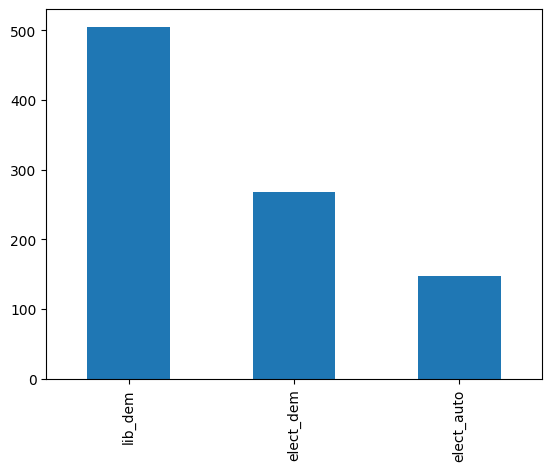

In [16]:
# Check distribution of V-Dem Regimes of the World before oversampling
row_counts = knn_classifier_row_data_micro_over['v2x_regime'].value_counts()
row_counts.plot(kind='bar')
plt.xlabel('');

In [17]:
# Define target and features
target = knn_classifier_row_data_micro_over['v2x_regime']
features = knn_classifier_row_data_micro_over.drop(columns='v2x_regime')

In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [39]:
# Oversampling minority class
oversample = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

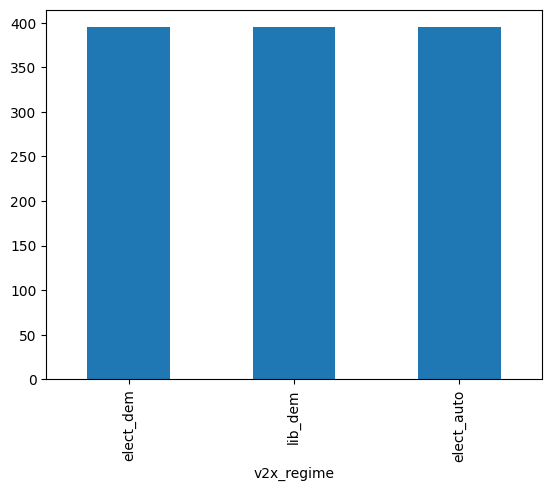

In [20]:
# Check distribution of V-Dem Regimes of the World after oversampling
row_counts2 = y_train_over.value_counts()
row_counts2.plot(kind='bar');

In [21]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled_np = scaler.fit_transform(X_train_over)
X_test_scaled_np = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train_over.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

In [22]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_class_micro_sel_over = KNeighborsClassifier(n_neighbors=3)

In [23]:
# Fit the model
knn_class_micro_sel_over.fit(X_train_scaled_df, y_train_over)

KNeighborsClassifier(n_neighbors=3)

In [24]:
pred = knn_class_micro_sel_over.predict(X_train_scaled_df)
#pred

In [25]:
knn_class_micro_sel_over.score(X_test_scaled_df, y_test)
#print(f"The accuracy of the model is {round(knn_class_micro_sel_over.score(X_test_scaled_df, y_test)*100,2)}%")

0.8858695652173914

**Outcome:** The accuracy of the model is 88.59%.

**Summary:**
- After using StandardScaler and applying oversampling, the accuracy of the model based on the **Judicial Autonomy micro indicators (features) and V-Dem Regimes of the World (target)** is **88.59%**, and therefore **slightly lower than before (91.30%)**. 

#### 3.1.2 Based on Judicial Autonomy Macro Indicators

In [26]:
# Select relevant columns for KNN classification model
columns_macro_row_knn_class_model_over=['v2x_regime',
                                   'q1_macro_appointment_procedures_ind_measure',
                                   'q1_macro_selection_criteria_ind_measure',
                                   'q1_macro_professional_rights_ind_measure',
                                   'q1_macro_professional_obligations_ind_measure',
                                   'q1_macro_judicial_administration_ind_measure']

In [27]:
# Subset columns for KNN classification model
knn_classifier_row_data_macro_over = q1_index_macro_micro_vdem[columns_macro_row_knn_class_model_over].copy()

# Rename regimes of the world (target column)
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
knn_classifier_row_data_macro_over['v2x_regime'] = knn_classifier_row_data_macro_over['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

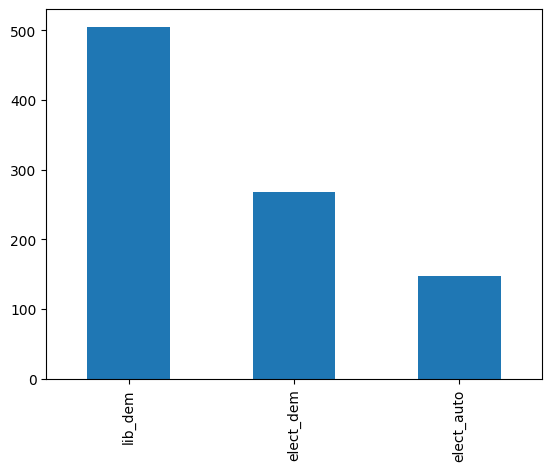

In [28]:
# Check distribution of V-Dem Regimes of the World before oversampling
row_counts = knn_classifier_row_data_macro_over['v2x_regime'].value_counts()
row_counts.plot(kind='bar')
plt.xlabel('');

In [29]:
# Define target and features
target = knn_classifier_row_data_macro_over['v2x_regime']
features = knn_classifier_row_data_macro_over.drop(columns='v2x_regime')

In [30]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [38]:
# Oversampling minority class
oversample = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

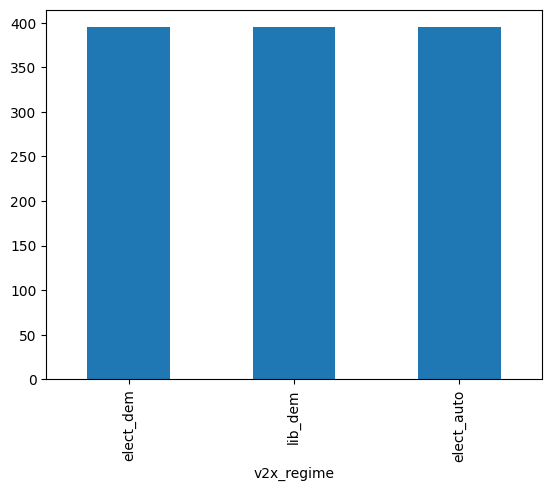

In [32]:
# Check distribution of V-Dem Regimes of the World after oversampling
row_counts2 = y_train_over.value_counts()
row_counts2.plot(kind='bar');

In [33]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled_np = scaler.fit_transform(X_train_over)
X_test_scaled_np = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train_over.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

In [34]:
# Initialize KNN instance (with hyperparameter n_neighbors=3)
knn_class_macro_sel_over = KNeighborsClassifier(n_neighbors=3)

In [35]:
# Fit the model
knn_class_macro_sel_over.fit(X_train_scaled_df, y_train_over)

KNeighborsClassifier(n_neighbors=3)

In [36]:
pred = knn_class_macro_sel_over.predict(X_train_scaled_df)
#pred

In [37]:
knn_class_macro_sel_over.score(X_test_scaled_df, y_test)
#print(f"The accuracy of the model is {round(knn_class_macro_sel_over.score(X_test_scaled_df, y_test)*100,2)}%")

0.8858695652173914

**Outcome:** The accuracy of the model is 88.59%.

**Summary:**
- After using StandardScaler and applying oversampling, the accuracy of the model based on the **Judicial Autonomy micro indicators (features) and V-Dem Regimes of the World (target)** is **88.59%**, and therefore **slightly lower than before (89.67%)**. 